In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

#from ggplot import diamonds

plt.style.use('ggplot')  
%matplotlib inline

In [2]:
#trainFile = "C://Users//sagar//Documents//MIDS//W207//train.csv"
trainFile = os.getcwd() + "//train.csv"
trainFile

'C:\\Users\\I822363\\Documents\\MIDS\\W207\\Fall2017-Section3-master\\Projects//train.csv'

# Load data and basic EDA

In [3]:
train_df = pd.read_csv(trainFile)
train_df.shape

(595212, 59)

In [29]:
train_df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


Let's remobve unwanted columns

In [30]:
#Drop unnecessary columns
train_df.drop('id',axis=1,inplace=True)
train_df.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
1,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
2,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
3,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [5]:
train_df.isnull().any().any()
#train_df.columns[train_df.isnull().any()].tolist()

False

No Null values, which is great!!

Let's check for missing values and short list columns with missing entries

In [6]:
value_list = [-1]
missing_val_cols = train_df.columns[train_df.isin(value_list).any()].tolist()
train_df[missing_val_cols].head()

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_05_cat,ps_car_07_cat,ps_car_09_cat,ps_car_11,ps_car_12,ps_car_14
0,2,1,0,0.718070,10,1,-1,1,1,0,2,0.400000,0.370810
1,1,0,0,0.766078,11,1,-1,-1,1,2,3,0.316228,0.388716
2,4,1,0,-1.000000,7,1,-1,-1,1,2,1,0.316228,0.347275
3,1,0,0,0.580948,7,1,0,1,1,3,1,0.374166,0.294958
4,2,1,0,0.840759,11,1,-1,-1,1,2,3,0.316070,0.365103


In [7]:
#train_df.apply(lambda x: sum(x.isin(value_list).values), axis = 0)
#(train_df['ps_ind_04_cat'] == -1).sum()


In [8]:
# Build subset dataframe of missing value columns
missing_val_summary = pd.DataFrame(
    data = train_df[missing_val_cols].apply(
        lambda x: round(100 * (x == -1).mean(),5), axis=0),
                        columns =['Percentage'])

# visualize the columns having missing values
missing_val_summary.sort_values('Percentage', ascending = False)

,Percentage
ps_car_03_cat,69.08984
ps_car_05_cat,44.78253
ps_reg_03,18.10649
ps_car_14,7.16047
ps_car_07_cat,1.93024
ps_ind_05_cat,0.97595
ps_car_09_cat,0.09560
ps_ind_02_cat,0.03629
ps_car_01_cat,0.01798
ps_ind_04_cat,0.01394


Clearly from the above table, the first 3 entries may not be suitable for prediction. 

Let's check the correlation

Let's do a count plot of the target variable to show the distribution

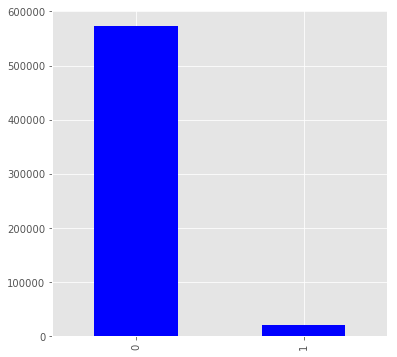

0    573518
1     21694
Name: target, dtype: int64

In [27]:

train_df['target'].value_counts().plot(
                                        kind = 'bar', 
                                        figsize=(6,6),         # Plot size
                                        color="blue")
plt.show()
train_df['target'].value_counts()

Imbalanced dataset with claims filed less than 4% of the overall data

In [10]:
train_df.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [11]:
bin_predictors = list(train_df[train_df.columns[
    train_df.columns.to_series().str.contains('_bin')]])

# Ensure that we have only binary predictors
train_df[bin_predictors].head()

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1
1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0
2,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0


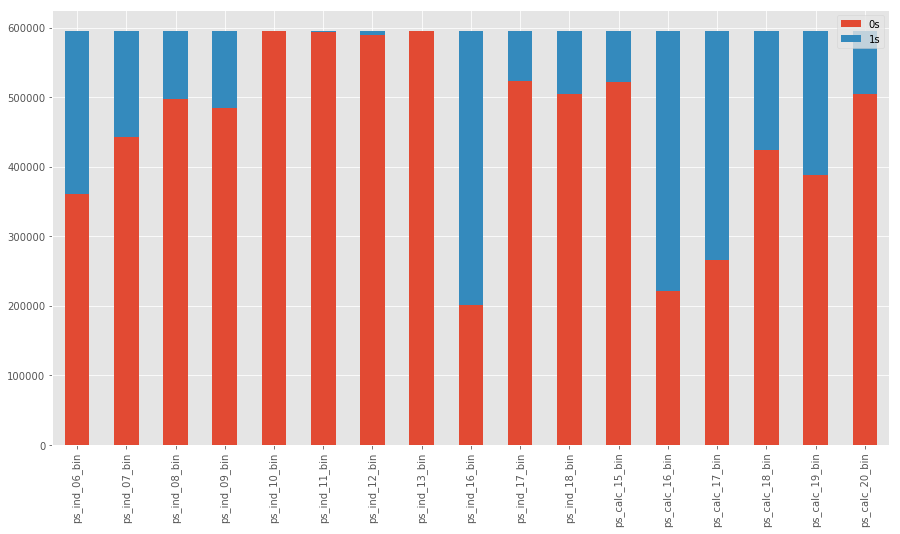

In [12]:
bin_distr_df = pd.DataFrame(index = bin_predictors,
                            columns = ['0s', '1s'] )
#bin_distr_df.apply(lambda x: (train_df[bin_predictors] == 0).sum(), axis=0)
bin_distr_df['0s'] = (train_df[bin_predictors] == 0).sum()
bin_distr_df['1s'] = (train_df[bin_predictors] == 1).sum()

bin_distr_df.plot(kind = 'bar', stacked = True, figsize = (15,8))

It appears there is no or less signal in the columns ending with 10_bin, 11_bin, 12_bin and 13_bin.

## Categorical variables analysis

In [13]:
cat_predictors = list(train_df[train_df.columns[
    train_df.columns.to_series().str.contains('_cat')]])

# Ensure that we have only Categorical predictors
train_df[cat_predictors].head()

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
0,2,1,0,10,1,-1,0,1,4,1,0,0,1,12
1,1,0,0,11,1,-1,0,-1,11,1,1,2,1,19
2,4,1,0,7,1,-1,0,-1,14,1,1,2,1,60
3,1,0,0,7,1,0,0,1,11,1,1,3,1,104
4,2,1,0,11,1,-1,0,-1,14,1,1,2,1,82


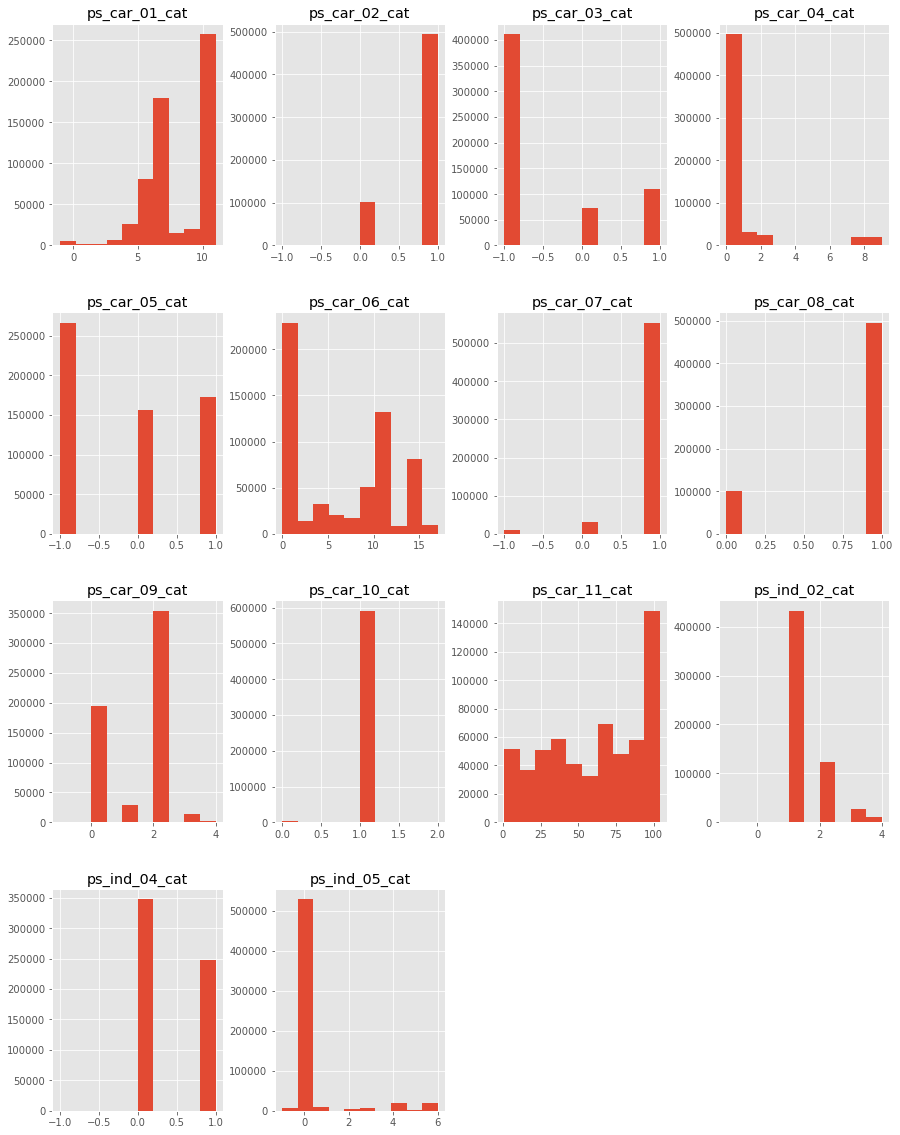

In [28]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
train_df[cat_predictors].hist(ax = ax)
plt.show()

The above graphs state:
1. ps_car_03_cat > 400,000
2. ps_car_05_cat > 250,000
3. ps_car_07_cat < 10000 (opportunity to impute)

The columns ps_car_03_cat and ps_car_05_cat may not be included for modeling 

## Dataset description

In [47]:
rem_predictors = list(set(train_df.columns) - set(cat_predictors) - set(bin_predictors) - set(['target']))
train_df[rem_predictors].head()

,ps_ind_01,ps_ind_15,ps_calc_07,ps_car_13,ps_car_14,ps_ind_03,ps_reg_03,ps_calc_13,ps_ind_14,ps_calc_12,...,ps_calc_11,ps_car_15,ps_calc_02,ps_car_11,ps_calc_10,ps_reg_02,ps_calc_05,ps_calc_09,ps_calc_14,ps_calc_06
0,2,11,1,0.883679,0.370810,5,0.718070,5,0,1,...,9,3.605551,0.5,2,5,0.2,1,1,8,10
1,1,3,5,0.618817,0.388716,7,0.766078,1,0,1,...,3,2.449490,0.1,3,7,0.4,1,1,9,9
2,5,12,1,0.641586,0.347275,9,-1.000000,7,0,2,...,4,3.316625,0.7,1,7,0.0,2,2,7,9
3,0,8,1,0.542949,0.294958,2,0.580948,4,0,2,...,2,2.000000,0.9,1,2,0.2,4,4,9,7
4,0,9,3,0.565832,0.365103,0,0.840759,1,0,1,...,3,2.000000,0.6,3,12,0.6,2,2,3,6


In [49]:
train_df[rem_predictors].describe()

,ps_ind_01,ps_ind_15,ps_calc_07,ps_car_13,ps_car_14,ps_ind_03,ps_reg_03,ps_calc_13,ps_ind_14,ps_calc_12,...,ps_calc_11,ps_car_15,ps_calc_02,ps_car_11,ps_calc_10,ps_reg_02,ps_calc_05,ps_calc_09,ps_calc_14,ps_calc_06
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,7.299922,3.005823,0.813265,0.276256,4.423318,0.551102,2.872288,0.012451,1.441918,...,5.441382,3.065899,0.449589,2.346072,8.433590,0.439184,1.885886,2.339034,7.539026,7.689445
std,1.983789,3.546042,1.414564,0.224588,0.357154,2.699902,0.793506,1.694887,0.127545,1.202963,...,2.332871,0.731366,0.286893,0.832548,2.904597,0.404264,1.134927,1.246949,2.746652,1.334312
min,0.000000,0.000000,0.000000,0.250619,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,2.000000,0.670867,0.333167,2.000000,0.525000,2.000000,0.000000,1.000000,...,4.000000,2.828427,0.200000,2.000000,6.000000,0.200000,1.000000,1.000000,6.000000,7.000000
50%,1.000000,7.000000,3.000000,0.765811,0.368782,4.000000,0.720677,3.000000,0.000000,1.000000,...,5.000000,3.316625,0.400000,3.000000,8.000000,0.300000,2.000000,2.000000,7.000000,8.000000
75%,3.000000,10.000000,4.000000,0.906190,0.396485,6.000000,1.000000,4.000000,0.000000,2.000000,...,7.000000,3.605551,0.700000,3.000000,10.000000,0.600000,3.000000,3.000000,9.000000,9.000000
max,7.000000,13.000000,9.000000,3.720626,0.636396,11.000000,4.037945,13.000000,4.000000,10.000000,...,19.000000,3.741657,0.900000,3.000000,25.000000,1.800000,6.000000,7.000000,23.000000,10.000000


## Correlation plot

### continuous variables

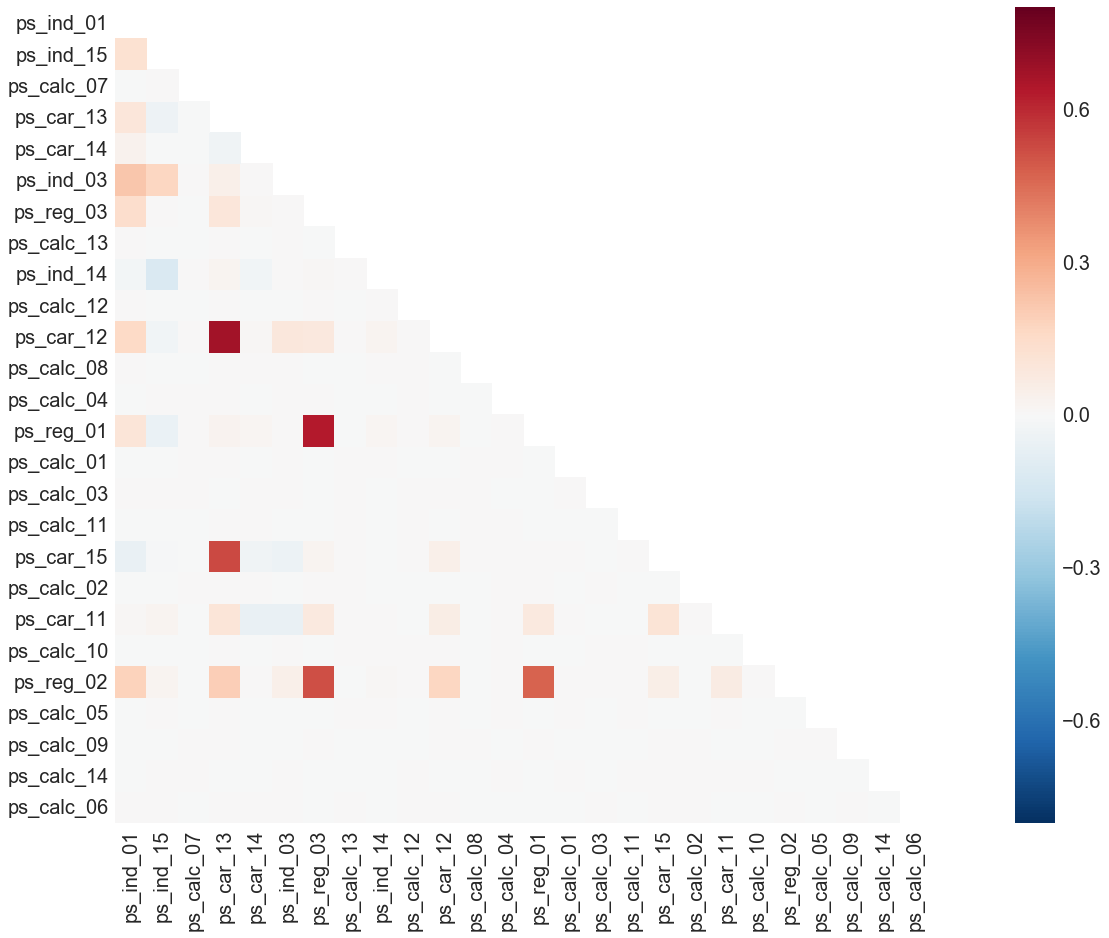

In [95]:
import seaborn as sns
import numpy as np
def heatplot(predictors):
    sns.set(font_scale=2)
    corr = train_df[predictors].corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        fig, ax = plt.subplots(figsize=(30,15))  
        ax = sns.heatmap(corr, mask=mask, vmax=.8, square=True)

heatplot(rem_predictors)

Only moderate correlation seen in 5 pairs of variables. No perfect correlation seen, and therefore no opportunity to eliminate few columns
1. ps_car_13 vs ps_reg_12
2. ps_car_13 vs ps_reg_15
3. ps_reg_03 vs ps_reg_02
4. ps_reg_03 vs ps_reg_01
5. ps_reg_01 vs ps_reg_02


### Binary variables

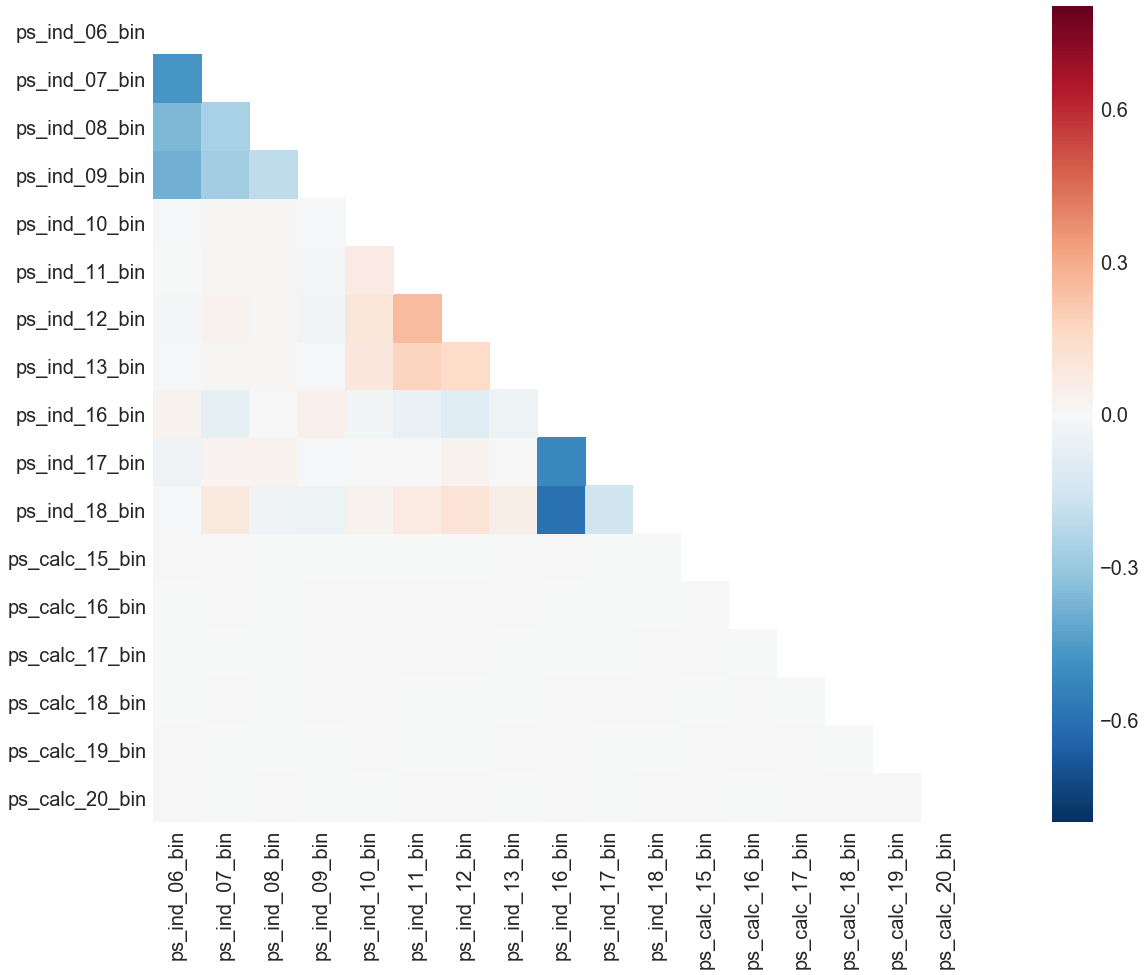

In [96]:
heatplot(bin_predictors)